In [8]:
%matplotlib inline
from pycalphad import equilibrium
from pycalphad import Database, Model
import pycalphad.variables as v

In [9]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL5FE4', 'FCC_A1', 'B2_BCC', 'AL13FE4']

In [10]:
%time eq= equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.X('AL'): (0,1,0.02), v.T: 300, v.P: 101325}, verbose=False)

CPU times: user 1min 51s, sys: 15.7 s, total: 2min 7s
Wall time: 1min 48s


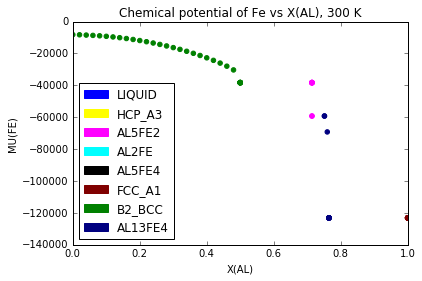

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
plt.gca().set_xlim((0,1))
temp = 300
plt.gca().set_title('Chemical potential of Fe vs X(AL), {} K'.format(temp))
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('MU(FE)')

phase_handles, phasemap = phase_legend(my_phases_alfe)
phasecolors = [phasemap[str(p)] for p in eq.Phase.sel(T=temp, vertex=0).values[0] if p != '']
plt.scatter(eq.X.sel(T=temp, component='AL', vertex=0), eq.MU.sel(T=temp, component='FE'), color=phasecolors)
phasecolors = [phasemap[str(p)] for p in eq.Phase.sel(T=temp, vertex=1).values[0] if p != '']
plt.scatter(eq.X.sel(T=temp, component='AL', vertex=1), eq.MU.sel(T=temp, component='FE'), color=phasecolors)
plt.gca().legend(phase_handles, my_phases_alfe, loc='lower left')